For Data Cleaning and adding more predictors before applying to machine learning model

Note: nicknames.txt that contain NBA teams and their abbreviation need to be uploaded to the folder for later use

In [4]:
import pandas as pd

In [5]:
mvps = pd.read_csv("mvps.csv", encoding='utf-8-sig')

In [6]:
mvps.head()

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,2,Magic Johnson,31,LAL,10,497,960,0.518,79,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,2,3,David Robinson,25,SAS,6,476,960,0.496,82,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,3,4,Charles Barkley,27,PHI,2,222,960,0.231,67,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,4,5,Karl Malone,27,UTA,0,142,960,0.148,82,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


In [7]:
mvps.tail()

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
503,4,5,Jalen Brunson,27,NYK,0,142,990,0.143,77,...,3.6,6.7,0.9,0.2,0.479,0.401,0.847,11.2,0.198,2024
504,5,6,Jayson Tatum,25,BOS,0,86,990,0.087,74,...,8.1,4.9,1.0,0.6,0.471,0.376,0.833,10.4,0.189,2024
505,6,7,Anthony Edwards,22,MIN,0,18,990,0.018,79,...,5.4,5.1,1.3,0.5,0.461,0.357,0.836,7.5,0.130,2024
506,7,8,Domantas Sabonis,27,SAC,0,3,990,0.003,82,...,13.7,8.2,0.9,0.6,0.594,0.379,0.704,12.6,0.206,2024
507,8,9,Kevin Durant,35,PHO,0,1,990,0.001,75,...,6.6,5.0,0.9,1.2,0.523,0.413,0.856,8.3,0.142,2024


In [8]:
# Make sure players like Luka Dončić who have special characters in their name are typed correctly
mvps[mvps["Player"].str.contains("Luka")]

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
450,3,4,Luka Dončić,20,DAL,0,200,1010,0.198,61,...,9.4,8.8,1.0,0.2,0.463,0.316,0.758,8.8,0.207,2020
464,5,6,Luka Dončić,21,DAL,0,42,1010,0.042,66,...,8.0,8.6,1.0,0.5,0.479,0.350,0.730,7.7,0.163,2021
478,4,5,Luka Dončić,22,DAL,0,146,1000,0.146,65,...,9.1,8.7,1.2,0.6,0.457,0.353,0.744,7.6,0.159,2022
493,7,8,Luka Dončić,23,DAL,0,10,1000,0.010,66,...,8.6,8.0,1.4,0.5,0.496,0.342,0.742,10.2,0.204,2023
501,2,3,Luka Dončić,24,DAL,4,566,990,0.572,70,...,9.2,9.8,1.4,0.5,0.487,0.382,0.786,12.0,0.220,2024


In [9]:
# Delete all unneeded columns
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [10]:
# Inspect one of the years
mvps[mvps["Year"] == 2022]

,Player,Year,Pts Won,Pts Max,Share
474,Nikola Jokić,2022,875,1000,0.875
475,Joel Embiid,2022,706,1000,0.706
476,Giannis Antetokounmpo,2022,595,1000,0.595
477,Devin Booker,2022,216,1000,0.216
478,Luka Dončić,2022,146,1000,0.146
479,Jayson Tatum,2022,43,1000,0.043
480,Ja Morant,2022,10,1000,0.010
481,Stephen Curry,2022,4,1000,0.004
482,Chris Paul,2022,2,1000,0.002
483,DeMar DeRozan,2022,1,1000,0.001


In [11]:
players = pd.read_csv("players.csv", encoding='utf-8-sig')

In [12]:
players.head(15)

,Unnamed: 0,Rk,Player,Age,Team,Pos,G,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Year
0,0,1,Michael Jordan,27,CHI,SG,82,82,37.0,12.1,...,4.6,6.0,5.5,2.7,1.0,2.5,2.8,31.5,"MVP-1,DPOY-7,AS,NBA1",1991
1,1,2,Karl Malone,27,UTA,PF,82,82,40.3,10.3,...,8.9,11.8,3.3,1.1,1.0,3.0,3.3,29.0,"MVP-5,AS,NBA1",1991
2,2,3,Bernard King,34,WSB,SF,64,64,37.5,11.1,...,3.2,5.0,4.6,0.9,0.3,4.0,2.9,28.4,"MVP-16,AS,NBA3",1991
3,3,4,Charles Barkley,27,PHI,SF,67,67,37.3,9.9,...,6.3,10.1,4.2,1.6,0.5,3.1,2.6,27.6,"MVP-4,AS,NBA1",1991
4,4,5,Patrick Ewing,28,NYK,C,81,81,38.3,10.4,...,8.8,11.2,3.0,1.0,3.2,3.6,3.5,26.6,"MVP-11,DPOY-7,AS,NBA2",1991
5,5,6,Michael Adams,28,DEN,PG,66,66,35.5,8.5,...,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,NaN,1991
6,6,7,Dominique Wilkins,31,ATL,SF,81,81,38.0,9.5,...,5.8,9.0,3.3,1.5,0.8,2.5,1.9,25.9,"MVP-8,AS,NBA2",1991
7,7,8,Chris Mullin,27,GSW,SF,82,82,40.4,9.5,...,3.7,5.4,4.0,2.1,0.8,3.0,2.1,25.7,"AS,NBA2",1991
8,8,9,David Robinson,25,SAS,C,82,81,37.7,9.2,...,8.9,13.0,2.5,1.5,3.9,3.3,3.2,25.6,"MVP-3,DPOY-2,AS,NBA1",1991
9,9,10,Orlando Woolridge,31,DEN,SF,53,50,34.4,9.2,...,4.2,6.8,2.2,1.3,0.4,2.9,2.7,25.1,NaN,1991


In [13]:
# Make sure players like Luka Dončić who have special characters in their name are typed correctly
players[players["Player"].str.contains("Luka")]

,Unnamed: 0,Rk,Player,Age,Team,Pos,G,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Year
15837,23,24,Luka Dončić,19,DAL,SG,72,72,32.2,7.0,...,6.6,7.8,6.0,1.1,0.3,3.4,1.9,21.2,ROY-1,2019
16550,5,6,Luka Dončić,20,DAL,PG,61,61,33.6,9.5,...,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8,"MVP-4,AS,NBA1",2020
16969,424,340,Luka Šamanić,20,SAS,PF,3,1,16.0,1.7,...,3.0,3.3,2.0,0.0,0.7,0.7,2.0,5.3,NaN,2020
17222,5,6,Luka Dončić,21,DAL,PG,66,66,34.3,9.8,...,7.2,8.0,8.6,1.0,0.5,4.3,2.3,27.7,"MVP-6,AS,NBA1",2021
17794,577,429,Luka Šamanić,21,SAS,PF,33,4,9.3,1.4,...,1.6,2.1,0.5,0.2,0.2,0.6,1.3,3.7,NaN,2021
17949,4,5,Luka Dončić,22,DAL,PG,65,65,35.4,9.9,...,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4,"MVP-5,AS,NBA1",2022
18406,461,352,Luka Garza,23,DET,C,32,5,12.2,2.1,...,1.3,3.1,0.6,0.3,0.2,0.6,1.7,5.8,NaN,2022
18784,1,2,Luka Dončić,23,DAL,PG,66,66,36.2,10.9,...,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,"MVP-8,CPOY-8,AS,NBA1",2023
19004,221,180,Luka Šamanić,23,UTA,PF,7,4,23.0,3.7,...,4.3,4.3,2.1,0.9,0.3,1.4,2.4,9.9,NaN,2023
19168,385,301,Luka Garza,24,MIN,C,28,0,8.7,2.3,...,1.1,2.3,0.6,0.1,0.1,0.5,1.5,6.5,NaN,2023


In [14]:
# Delete not needed column
del players["Unnamed: 0"]

In [15]:
# Delete not needed column
del players["Rk"]

In [16]:
players["Player"].head(50)

0        Michael Jordan
1           Karl Malone
2          Bernard King
3       Charles Barkley
4         Patrick Ewing
5         Michael Adams
6     Dominique Wilkins
7          Chris Mullin
8        David Robinson
9     Orlando Woolridge
10       Mitch Richmond
11         Tim Hardaway
12        Reggie Miller
13        Kevin Johnson
14       Hersey Hawkins
15        Tony Campbell
16       Brad Daugherty
17        Clyde Drexler
18         James Worthy
19      Hakeem Olajuwon
20         Ricky Pierce
21         Ricky Pierce
22         Ricky Pierce
23           Joe Dumars
24          Roy Tarpley
25         Antoine Carr
26        Charles Smith
27       Wayman Tisdale
28     Rolando Blackman
29         Tom Chambers
30         Derek Harper
31           Ron Harper
32           Larry Bird
33        Magic Johnson
34          Larry Nance
35         Reggie Lewis
36          Jeff Malone
37         Reggie Theus
38      Sherman Douglas
39      Derrick Coleman
40         Kevin McHale
41         Chuck

In [17]:
#players["Player"] = players["Player"].str.replace("*","", regex=False)

In [18]:
# Most players only play on 1 team in a given season
players[players["Player"] == "Steven Adams"]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Year
13086,Steven Adams,20,OKC,C,81,20,14.8,1.1,2.3,.503,...,2.3,4.1,0.5,0.5,0.7,0.9,2.5,3.3,ROY-7,2014
13526,Steven Adams,21,OKC,C,70,67,25.3,3.1,5.7,.544,...,4.6,7.5,0.9,0.5,1.2,1.4,3.2,7.7,NaN,2015
14153,Steven Adams,22,OKC,C,80,80,25.2,3.3,5.3,.613,...,3.9,6.7,0.8,0.5,1.1,1.1,2.8,8.0,NaN,2016
14641,Steven Adams,23,OKC,C,80,80,29.9,4.7,8.2,.571,...,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,NaN,2017
15233,Steven Adams,24,OKC,C,76,76,32.7,5.9,9.4,.629,...,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,DPOY-12,2018
15929,Steven Adams,25,OKC,C,80,80,33.4,6.0,10.1,.595,...,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,NaN,2019
16733,Steven Adams,26,OKC,C,63,63,26.7,4.5,7.6,.592,...,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,NaN,2020
17545,Steven Adams,27,NOP,C,58,58,27.7,3.3,5.3,.614,...,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,NaN,2021
18330,Steven Adams,28,MEM,C,76,75,26.3,2.8,5.1,.547,...,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,NaN,2022
19067,Steven Adams,29,MEM,C,42,42,27.0,3.7,6.3,.597,...,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,NaN,2023


In [19]:
# But some players play on multiple teams in a single season, like Ricky Pierce in 1991 and 1997
players[players["Player"] == "Ricky Pierce"]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Year
20,Ricky Pierce,31,2TM,SG,78,2,27.8,7.2,14.8,.485,...,1.6,2.4,2.2,0.8,0.2,1.9,2.2,20.5,"6MOY-4,AS",1991
21,Ricky Pierce,31,MIL,SG,46,0,28.8,7.8,15.7,.499,...,1.7,2.5,2.1,0.8,0.2,2.0,2.0,22.5,NaN,1991
22,Ricky Pierce,31,SEA,SG,32,2,26.3,6.3,13.6,.463,...,1.4,2.3,2.3,0.7,0.1,1.7,2.5,17.5,NaN,1991
466,Ricky Pierce,32,SEA,SG,78,78,34.1,7.9,16.7,.475,...,1.8,3.0,3.1,1.1,0.3,2.4,2.7,21.7,NaN,1992
961,Ricky Pierce,33,SEA,SG,77,72,28.8,6.8,13.9,.489,...,1.7,2.5,2.9,1.3,0.1,2.1,2.2,18.2,NaN,1993
1467,Ricky Pierce,34,SEA,SG,51,0,20.0,5.3,11.3,.471,...,1.1,1.6,1.8,0.8,0.1,1.3,1.6,14.5,6MOY-4,1994
2005,Ricky Pierce,35,GSW,PG,27,6,24.9,4.1,9.4,.437,...,1.9,2.4,1.5,0.8,0.1,0.9,1.4,12.5,NaN,1995
2551,Ricky Pierce,36,IND,SG,76,2,18.5,3.5,7.8,.447,...,1.3,1.8,1.3,0.8,0.1,1.2,2.5,9.7,NaN,1996
3055,Ricky Pierce,37,2TM,SG,60,27,20.8,4.0,8.3,.481,...,1.4,2.0,1.3,0.5,0.2,1.1,1.6,11.0,NaN,1997
3056,Ricky Pierce,37,DEN,SG,33,10,18.2,3.6,7.9,.462,...,1.1,1.6,0.9,0.4,0.2,1.2,1.5,10.2,NaN,1997


In [20]:
# So we will combine all the stats into a single row for players like Ricky Pierce
# If the team contains keyword 'TM' such as '2TM' for 2 teams played or '3TM' for 3 teams played,
# then take the last team they played for as the entry for the combined row
def single_team(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Team"].str.contains("TM")]
        row["Team"] = df.iloc[-1,:]["Team"] # Assign the last team they played for as their designated "Team" column entry
        return row

# Then 
players = players.groupby(["Player", "Year"]).apply(single_team)

C:\Users\s1155147304\AppData\Local\Temp\ipykernel_2488\4221241156.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players = players.groupby(["Player", "Year"]).apply(single_team)


In [21]:
players[players["Player"] == "Ricky Pierce"]

Player Age Team Pos   G  GS    MP   FG   FGA  \
Player       Year                                                            
Ricky Pierce 1991 20    Ricky Pierce  31  SEA  SG  78   2  27.8  7.2  14.8   
             1992 466   Ricky Pierce  32  SEA  SG  78  78  34.1  7.9  16.7   
             1993 961   Ricky Pierce  33  SEA  SG  77  72  28.8  6.8  13.9   
             1994 1467  Ricky Pierce  34  SEA  SG  51   0  20.0  5.3  11.3   
             1995 2005  Ricky Pierce  35  GSW  PG  27   6  24.9  4.1   9.4   
             1996 2551  Ricky Pierce  36  IND  SG  76   2  18.5  3.5   7.8   
             1997 3055  Ricky Pierce  37  CHH  SG  60  27  20.8  4.0   8.3   
             1998 3895  Ricky Pierce  38  MIL  SG  39   0  11.3  1.3   3.7   

                         FG%  ...  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
Player       Year             ...                                            
Ricky Pierce 1991 20    .485  ...  1.6  2.4  2.2  0.8  0.2  1.9  2.2  20.5   
             1992 466   .475  ...  1.8  3.0  3.1  1.1  0.3  2.4  2.7  21.7   
             1993 961   .489  ...  1.7  2.5  2.9  1.3  0.1  2.1  2.2  18.2   
             1994 1467  .471  ...  1.1  1.6  1.8  0.8  0.1  1.3  1.6  14.5   
             1995 2005  .437  ...  1.9  2.4  1.5  0.8  0.1  0.9  1.4  12.5   
             1996 2551  .447  ...  1.3  1.8  1.3  0.8  0.1  1.2  2.5   9.7   
             1997 3055  .481  ...  1.4  2.0  1.3  0.5  0.2  1.1  1.6  11.0   
             1998 3895  .364  ...  0.7  1.2  0.9  0.2  0.0  0.5  0.9   3.9   

                           Awards  Year  
Player       Year                        
Ricky Pierce 1991 20    6MOY-4,AS  1991  
             1992 466         NaN  1992  
             1993 961         NaN  1993  
             1994 1467     6MOY-4  1994  
             1995 2005        NaN  1995  
             1996 2551        NaN  1996  
             1997 3055        NaN  1997  
             1998 3895        NaN  1998  

[8 rows x 31 columns]

In [22]:
# Because of groupby(), the Player and Year both become indexes in that order, so remove them
players.index = players.index.droplevel()

In [23]:
players.index = players.index.droplevel()

In [24]:
# Check final results:
players[players["Player"] == "Ricky Pierce"]

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Year
20,Ricky Pierce,31,SEA,SG,78,2,27.8,7.2,14.8,.485,...,1.6,2.4,2.2,0.8,0.2,1.9,2.2,20.5,"6MOY-4,AS",1991
466,Ricky Pierce,32,SEA,SG,78,78,34.1,7.9,16.7,.475,...,1.8,3.0,3.1,1.1,0.3,2.4,2.7,21.7,NaN,1992
961,Ricky Pierce,33,SEA,SG,77,72,28.8,6.8,13.9,.489,...,1.7,2.5,2.9,1.3,0.1,2.1,2.2,18.2,NaN,1993
1467,Ricky Pierce,34,SEA,SG,51,0,20.0,5.3,11.3,.471,...,1.1,1.6,1.8,0.8,0.1,1.3,1.6,14.5,6MOY-4,1994
2005,Ricky Pierce,35,GSW,PG,27,6,24.9,4.1,9.4,.437,...,1.9,2.4,1.5,0.8,0.1,0.9,1.4,12.5,NaN,1995
2551,Ricky Pierce,36,IND,SG,76,2,18.5,3.5,7.8,.447,...,1.3,1.8,1.3,0.8,0.1,1.2,2.5,9.7,NaN,1996
3055,Ricky Pierce,37,CHH,SG,60,27,20.8,4.0,8.3,.481,...,1.4,2.0,1.3,0.5,0.2,1.1,1.6,11.0,NaN,1997
3895,Ricky Pierce,38,MIL,SG,39,0,11.3,1.3,3.7,.364,...,0.7,1.2,0.9,0.2,0.0,0.5,0.9,3.9,NaN,1998


In [25]:
# Do all the same steps for the players_advanced dataset
players_advanced = pd.read_csv("players_advanced.csv", encoding='utf-8-sig')
players_advanced.head(15)

,Unnamed: 0,Rk,Player,Age,Team,Pos,G,GS,MP,PER,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards,Year
0,0,1,Chris Mullin,27,GSW,SF,82,82,3315,21.4,...,9.7,2.4,12.2,.176,4.5,0.1,4.7,5.6,"AS,NBA2",1991
1,1,2,Karl Malone,27,UTA,PF,82,82,3302,24.8,...,9.9,5.6,15.5,.225,4.8,0.6,5.4,6.2,"MVP-5,AS,NBA1",1991
2,2,3,Tim Hardaway,24,GSW,PG,82,82,3215,20.9,...,7.4,2.5,9.9,.148,4.5,-0.1,4.4,5.2,"MVP-19,AS",1991
3,3,4,Tyrone Corbin,28,MIN,SF,82,82,3196,16.6,...,2.6,2.9,5.4,.081,0.5,0.4,0.9,2.3,NaN,1991
4,4,5,Pooh Richardson,24,MIN,PG,82,82,3154,18.1,...,4.5,1.3,5.9,.089,3.1,-1.1,2.0,3.2,NaN,1991
5,5,6,Sam Mitchell,27,MIN,PF,82,60,3121,12.3,...,3.7,1.4,5.1,.078,-1.8,-1.3,-3.2,-0.9,NaN,1991
6,6,7,Hersey Hawkins,24,PHI,SG,80,80,3110,19.4,...,6.5,3.3,9.8,.151,2.4,0.9,3.3,4.1,AS,1991
7,7,8,Patrick Ewing,28,NYK,C,81,81,3104,23.7,...,4.4,5.6,10.0,.155,2.5,1.7,4.2,4.9,"MVP-11,DPOY-7,AS,NBA2",1991
8,8,9,John Stockton,28,UTA,PG,82,82,3103,23.4,...,9.4,4.7,14.0,.217,5.8,2.5,8.3,8.1,"MVP-12,DPOY-7,AS,NBA3",1991
9,9,10,David Robinson,25,SAS,C,82,81,3095,27.4,...,9.4,7.6,17.0,.264,5.2,3.3,8.5,8.2,"MVP-3,DPOY-2,AS,NBA1",1991


In [26]:
# Delete unwanted columns or columns that overlap with 'players' dataset
players_advanced = players_advanced[["Player", "Year", "Team", "PER", "TS%", "TRB%", "AST%", "STL%", "BLK%", "TOV%", "USG%", "WS", "WS/48", "BPM", "VORP"]]

In [27]:
#del players_advanced["Unnamed: 0"]

In [28]:
#del players_advanced["Rk"]

In [29]:
players_advanced = players_advanced.groupby(["Player", "Year"]).apply(single_team)

C:\Users\s1155147304\AppData\Local\Temp\ipykernel_2488\154923565.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players_advanced = players_advanced.groupby(["Player", "Year"]).apply(single_team)


In [30]:
players_advanced.index = players_advanced.index.droplevel()

In [31]:
players_advanced.index = players_advanced.index.droplevel()

In [32]:
# Now join both datasets 'players' and 'players_advanced' via the Player and Year
combined_players = players.merge(players_advanced, how="outer", on=["Player", "Year"])

In [33]:
# Now join both datasets 'mvps' and 'players' via the Player and Year
combined = combined_players.merge(mvps, how="outer", on=["Player", "Year"])

In [34]:
# Some people have null values in Pts Won, Pts Max, and Share because they are not present in the mvps table
combined

,Player,Age,Team_x,Pos,G,GS,MP,FG,FGA,FG%,...,BLK%,TOV%,USG%,WS,WS/48,BPM,VORP,Pts Won,Pts Max,Share
0,A.C. Green,27,LAL,PF,82,21,26.4,3.1,6.6,.476,...,0.6,12.8,15.6,6.1,.135,0.0,1.1,NaN,NaN,NaN
1,A.C. Green,28,LAL,PF,82,53,35.4,4.7,9.8,.476,...,0.8,10.0,16.8,8.8,.145,0.7,2.0,NaN,NaN,NaN
2,A.C. Green,29,LAL,PF,82,55,34.4,4.6,8.6,.537,...,0.9,11.8,15.0,8.6,.147,0.7,1.9,NaN,NaN,NaN
3,A.C. Green,30,PHO,PF,82,55,34.5,5.7,11.3,.502,...,0.8,8.4,17.6,9.3,.157,0.6,1.8,NaN,NaN,NaN
4,A.C. Green,31,PHO,SF,82,52,32.8,3.8,7.5,.504,...,0.8,12.9,14.2,6.7,.120,-0.1,1.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15837,Željko Rebrača,29,DET,C,74,4,15.9,2.6,5.1,.505,...,4.4,15.7,21.4,3.3,.134,-2.3,-0.1,NaN,NaN,NaN
15838,Željko Rebrača,30,DET,C,30,12,16.3,2.7,4.8,.552,...,2.6,14.9,19.2,1.3,.133,-2.6,-0.1,NaN,NaN,NaN
15839,Željko Rebrača,31,ATL,C,24,2,11.4,1.4,3.2,.442,...,3.0,15.9,18.2,0.5,.097,-3.9,-0.1,NaN,NaN,NaN
15840,Željko Rebrača,32,LAC,C,58,2,16.0,2.3,4.0,.568,...,3.3,15.3,16.0,2.4,.122,-1.3,0.2,NaN,NaN,NaN


In [35]:
# So just replace with 0
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [36]:
combined.columns

Index(['Player', 'Age', 'Team_x', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Awards',
       'Year', 'Team_y', 'PER', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'WS', 'WS/48', 'BPM', 'VORP', 'Pts Won', 'Pts Max', 'Share'],
      dtype='object')

In [37]:
# Check if both Team columns are the same
combined['Team_x'].equals(combined['Team_y'])

True

In [38]:
# Delete one of the columns and rename the other to 'Team'
del combined["Team_y"]
combined.rename(columns={'Team_x': 'Team'}, inplace=True)

In [39]:
teams = pd.read_csv("teams.csv")

In [40]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
6,6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*


In [41]:
# Remove the rows with 'Division' keyword as a result of the webscraping
teams = teams[~teams["W"].str.contains("Division")].copy()

In [42]:
# Remove the asterisk in Team column
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [43]:
# Verify no more asterisk in team names:
sorted(teams["Team"].unique())

['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Bobcats',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans Pelicans',
 'New Orleans/Oklahoma City Hornets',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Seattle SuperSonics',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Washington Bullets',
 'Washington Wizards']

In [44]:
# In order to merge 'combined' dataframe with 'teams' dataframe, notice that the "Team" name column is abbreviated in the 'combined'
# dataframe, but is in long-form in the 'teams' dataframe
combined["Team"].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'MIL', 'CHI', 'GSW',
       'IND', 'WAS', 'MIN', 'BOS', 'ATL', 'HOU', 'DEN', 'ORL', 'NOH',
       'TOR', 'SAC', 'CHO', 'PHI', 'POR', 'DET', 'OKC', 'UTA', 'VAN',
       'SEA', 'NJN', 'NOK', 'LAC', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH', nan], dtype=object)

In [45]:
# So, using a 'nicknames.txt' file that contains a list of team names in the NBA with their abbreviation,
# use it to look up and replace the abbreviation with the long-form name in the 'combined' dataframe
nicknames = {}
with open("nicknames.txt") as f:
    lines = f.readlines()
    for line in lines[1:]: # Start from second row, first row is just header
        abbrev,name = line.replace("\n","").split(",") # ',' as delimiter, replace \n newline with blank
        nicknames[abbrev] = name # Map abbreviations to full-name into dictionary key : value pairs

In [46]:
combined["Team"] = combined["Team"].map(nicknames) # Map it onto the combined dataframe

In [47]:
# Verify if long-form team names are in use:
combined.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,BLK%,TOV%,USG%,WS,WS/48,BPM,VORP,Pts Won,Pts Max,Share
0,A.C. Green,27,Los Angeles Lakers,PF,82,21,26.4,3.1,6.6,.476,...,0.6,12.8,15.6,6.1,.135,0.0,1.1,0.0,0.0,0.0
1,A.C. Green,28,Los Angeles Lakers,PF,82,53,35.4,4.7,9.8,.476,...,0.8,10.0,16.8,8.8,.145,0.7,2.0,0.0,0.0,0.0
2,A.C. Green,29,Los Angeles Lakers,PF,82,55,34.4,4.6,8.6,.537,...,0.9,11.8,15.0,8.6,.147,0.7,1.9,0.0,0.0,0.0
3,A.C. Green,30,Phoenix Suns,PF,82,55,34.5,5.7,11.3,.502,...,0.8,8.4,17.6,9.3,.157,0.6,1.8,0.0,0.0,0.0
4,A.C. Green,31,Phoenix Suns,SF,82,52,32.8,3.8,7.5,.504,...,0.8,12.9,14.2,6.7,.120,-0.1,1.3,0.0,0.0,0.0


In [48]:
# Now join both datasets 'combined' and 'teams' via the Team and Year
train = combined.merge(teams, how="outer",on=["Team", "Year"])

In [49]:
train

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Doc Rivers,29,Atlanta Hawks,PG,79,79,32.7,5.6,12.9,.435,...,0.0,0.00,10.0,43,39,.524,18.0,109.8,109.0,0.72
1,Dominique Wilkins,31,Atlanta Hawks,SF,81,81,38.0,9.5,20.2,.470,...,960.0,0.03,10.0,43,39,.524,18.0,109.8,109.0,0.72
2,Duane Ferrell,25,Atlanta Hawks,SF,78,2,14.9,2.2,4.6,.489,...,0.0,0.00,10.0,43,39,.524,18.0,109.8,109.0,0.72
3,Gary Leonard,23,Atlanta Hawks,C,4,0,2.3,0.0,0.0,NaN,...,0.0,0.00,10.0,43,39,.524,18.0,109.8,109.0,0.72
4,John Battle,28,Atlanta Hawks,SG,79,2,23.6,5.0,10.9,.461,...,0.0,0.00,10.0,43,39,.524,18.0,109.8,109.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15837,League Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.460,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15838,League Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.466,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15839,League Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.461,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15840,League Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.475,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Delete all rows with column 'Player' has value 'League Average' 
indexPlayer = train[ train['Player'] == 'League Average' ].index
train.drop(indexPlayer , inplace=True)
train

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Doc Rivers,29,Atlanta Hawks,PG,79,79,32.7,5.6,12.9,.435,...,0.0,0.00,10.0,43,39,.524,18.0,109.8,109.0,0.72
1,Dominique Wilkins,31,Atlanta Hawks,SF,81,81,38.0,9.5,20.2,.470,...,960.0,0.03,10.0,43,39,.524,18.0,109.8,109.0,0.72
2,Duane Ferrell,25,Atlanta Hawks,SF,78,2,14.9,2.2,4.6,.489,...,0.0,0.00,10.0,43,39,.524,18.0,109.8,109.0,0.72
3,Gary Leonard,23,Atlanta Hawks,C,4,0,2.3,0.0,0.0,NaN,...,0.0,0.00,10.0,43,39,.524,18.0,109.8,109.0,0.72
4,John Battle,28,Atlanta Hawks,SG,79,2,23.6,5.0,10.9,.461,...,0.0,0.00,10.0,43,39,.524,18.0,109.8,109.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15803,Marvin Bagley III,24,Washington Wizards,C,50,25,21.1,4.8,8.2,.586,...,0.0,0.00,16.0,15,67,.183,32.0,113.7,123.0,-9.29
15804,Patrick Baldwin Jr.,21,Washington Wizards,SF,38,7,13.0,1.6,4.1,.381,...,0.0,0.00,16.0,15,67,.183,32.0,113.7,123.0,-9.29
15805,Richaun Holmes,30,Washington Wizards,C,40,10,13.9,2.1,3.7,.558,...,0.0,0.00,16.0,15,67,.183,32.0,113.7,123.0,-9.29
15806,Tristan Vukcevic,20,Washington Wizards,C,10,4,15.3,2.9,6.7,.433,...,0.0,0.00,16.0,15,67,.183,32.0,113.7,123.0,-9.29


In [51]:
# Delete unwanted column
del train["Unnamed: 0"]

In [52]:
train.columns

Index(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Awards',
       'Year', 'PER', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'WS', 'WS/48', 'BPM', 'VORP', 'Pts Won', 'Pts Max', 'Share', 'W', 'L',
       'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'],
      dtype='object')

In [53]:
train.dtypes

Player      object
Age         object
Team        object
Pos         object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Awards      object
Year         int64
PER         object
TS%         object
TRB%        object
AST%        object
STL%        object
BLK%        object
TOV%        object
USG%        object
WS          object
WS/48       object
BPM         object
VORP        object
Pts Won    float64
Pts Max    float64
Share      float64
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         

In [54]:
# Convert the object types to numeric and ignore errors
train = train.apply(pd.to_numeric, errors='ignore')

C:\Users\s1155147304\AppData\Local\Temp\ipykernel_2488\1643099672.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  train = train.apply(pd.to_numeric, errors='ignore')


In [55]:
# Notice that 'GB' is still an object, despite being a number
train.dtypes

Player      object
Age          int64
Team        object
Pos         object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Awards      object
Year         int64
PER        float64
TS%        float64
TRB%       float64
AST%       float64
STL%       float64
BLK%       float64
TOV%       float64
USG%       float64
WS         float64
WS/48      float64
BPM        float64
VORP       float64
Pts Won    float64
Pts Max    float64
Share      float64
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        f

In [56]:
# One of the values is non-numeric, a dash '-'
train["GB"].unique()

array(['18.0', '29.0', '14.0', '—', '10.0', '26.0', '13.0', '12.0', '2.0',
       '28.0', '27.0', '17.0', '15.0', '33.0', '46.0', '6.0', '22.0',
       '16.0', '20.0', '21.0', '3.0', '11.0', '25.0', '19.0', '5.0',
       '23.0', '12.5', '9.0', '8.0', '4.0', '35.0', '31.0', '1.0', '7.0',
       '32.0', '41.0', '24.0', '39.0', '45.0', '36.0', '37.0', '38.0',
       '4.5', '30.0', '43.0', '25.5', '44.0', '40.0', '42.0', '2.5',
       '51.0', '34.0', '20.5', '32.5', '48.0', '52.0', '3.5', '56.0',
       '10.5', '47.0', '11.5', '22.5', '1.5', '50.0', '21.5', '18.5'],
      dtype=object)

In [57]:
# Replace '-' with 0
train["GB"] = pd.to_numeric(train["GB"].str.replace("—","0"))

In [58]:
train.dtypes

Player      object
Age          int64
Team        object
Pos         object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Awards      object
Year         int64
PER        float64
TS%        float64
TRB%       float64
AST%       float64
STL%       float64
BLK%       float64
TOV%       float64
USG%       float64
WS         float64
WS/48      float64
BPM        float64
VORP       float64
Pts Won    float64
Pts Max    float64
Share      float64
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        f

In [59]:
train.to_csv("player_mvp_stats.csv")

In [60]:
highest_scoring = train[train["G"] > 70].sort_values("PTS", ascending=False).head(10)

<Axes: xlabel='Player'>

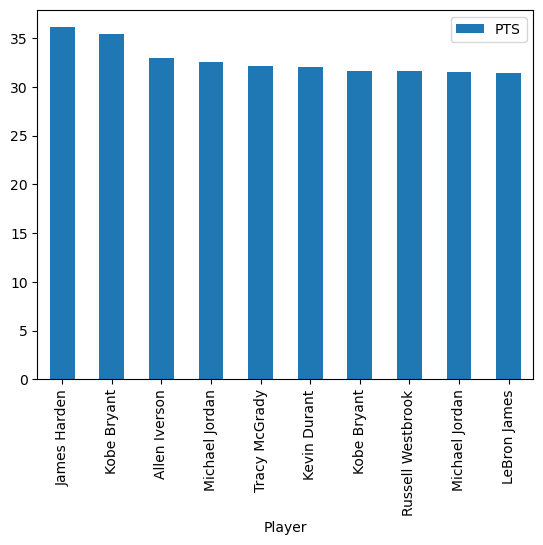

In [61]:
highest_scoring.plot.bar("Player", "PTS")

In [62]:
highest_scoring_by_year = train.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

C:\Users\s1155147304\AppData\Local\Temp\ipykernel_2488\900629629.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_scoring_by_year = train.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))


<Axes: xlabel='Year'>

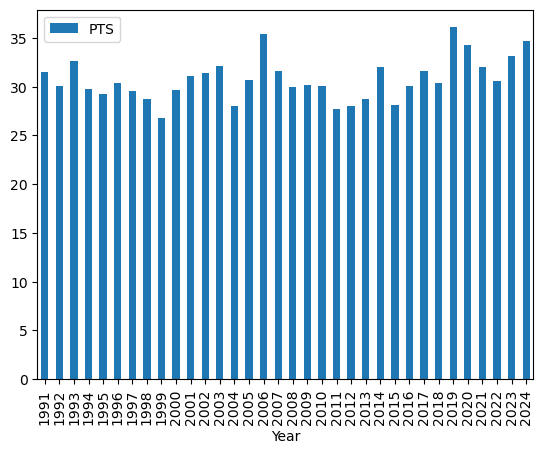

In [63]:
highest_scoring_by_year.plot.bar("Year", "PTS")

In [64]:
train.groupby("Year").apply(lambda x: x.shape[0])

C:\Users\s1155147304\AppData\Local\Temp\ipykernel_2488\3126292839.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train.groupby("Year").apply(lambda x: x.shape[0])


Year
1991    385
1992    386
1993    390
1994    403
1995    405
1996    428
1997    441
1998    439
1999    440
2000    439
2001    441
2002    440
2003    428
2004    442
2005    464
2006    458
2007    458
2008    450
2009    443
2010    442
2011    452
2012    478
2013    467
2014    480
2015    492
2016    476
2017    486
2018    540
2019    530
2020    529
2021    540
2022    605
2023    539
2024    572
dtype: int64

In [65]:
exclude_columns = ['Player', 'Age', 'Team', 'Pos', 'Awards']
correlation = train.drop(columns=exclude_columns).corr()['Share'].drop('Share')
print(correlation)

G          0.088749
GS         0.166344
MP         0.159173
FG         0.273347
FGA        0.244927
FG%        0.065322
3P         0.088044
3PA        0.088520
3P%        0.013335
2P         0.277279
2PA        0.252142
2P%        0.058210
eFG%       0.056248
FT         0.317960
FTA        0.323242
FT%        0.036692
ORB        0.103043
DRB        0.219480
TRB        0.192050
AST        0.201248
STL        0.171757
BLK        0.152507
TOV        0.232659
PF         0.075212
PTS        0.284547
Year      -0.009848
PER        0.217961
TS%        0.075185
TRB%       0.060692
AST%       0.150958
STL%       0.038012
BLK%       0.038571
TOV%      -0.022607
USG%       0.207179
WS         0.371118
WS/48      0.158782
BPM        0.184068
VORP       0.459215
Pts Won    0.994688
Pts Max    0.523973
W          0.119611
L         -0.119170
W/L%       0.123278
GB        -0.098147
PS/G       0.035805
PA/G      -0.037238
SRS        0.117748
Name: Share, dtype: float64
